In [1]:
import numpy as np
# %matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.linear_model

In [2]:
np.random.seed(2)

In [3]:
## make up some random polynomial coefficients
def groundTruthPoly_coeffs(deg, D):
    coeffs = np.random.random( (deg+1,D))-0.5
    # coeffs[0,1] = 0
    # coeffs[2,1] = 0
    # coeffs[3,0] = 0    
    for d in range(D):
        coeffs[:,d] /= np.arange(1,deg+2)
    return coeffs

In [4]:
## make up a (noisy) y=f(X) ground truth relationship
def groundTruthPoly(coeffs, X, noise):
    N = X.shape[0]
    y = np.zeros(N)
    P = coeffs.shape[0]
    for p in range(P):
        y += np.dot(X**p,c[p])
    y += np.sin(X[:,0]**2) +np.cos(X[:,0])  
    y+= np.random.normal(0,noise, y.shape)
    return y

## Data creation

In [5]:
## simple case where visualization is possible: D=2
D = 1
PGT = 3 # degree of ground truth polynom
N = 15
Nval=15
noise = 120
c = groundTruthPoly_coeffs(PGT, D)

In [6]:
X = (np.random.random((N,D))-0.5)*30
Xval = (np.random.random((Nval,D))-0.5)*30
X[:10]

array([[ -2.38896594],
       [ -5.08995537],
       [ -8.86054098],
       [  3.57812899],
       [ -6.01035979],
       [ -6.99518175],
       [  3.63401498],
       [  0.87426283],
       [-10.96260164],
       [  0.40734364]])

In [7]:
y = groundTruthPoly(c, X, noise)
yval = groundTruthPoly(c, Xval, noise)
y[:10]

array([-292.62949934,   18.29910808,   58.22287961,  161.04333209,
         65.65528043,  -93.58161609,   -1.76584044,   66.14653905,
        -11.11120758,   93.44584685])

Text(0.5, 0, 'X')

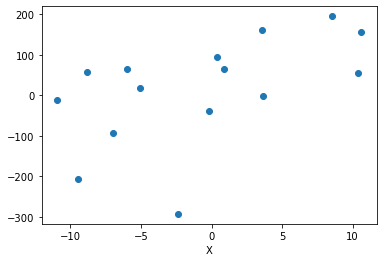

In [8]:
plt.scatter(X[:,0], y)
plt.xlabel("X")

## Feature Map

In [9]:
P=3
polyFeatures = sklearn.preprocessing.PolynomialFeatures(P)

In [10]:
polyFeatures.fit(X)

PolynomialFeatures(degree=3)

In [11]:
Xt = polyFeatures.transform(X)
Xt[:2], Xt.shape

(array([[   1.        ,   -2.38896594,    5.70715825,  -13.63420666],
        [   1.        ,   -5.08995537,   25.90764567, -131.86876019]]),
 (15, 4))

## for now, no regularization 

In [12]:
reg = sklearn.linear_model.LinearRegression()
reg

LinearRegression()

In [13]:
reg.fit(X,y)
reg.coef_, reg.intercept_

(array([10.00402177]), 22.7922991852057)

In [14]:
reg.fit(Xt,y)
reg.coef_, reg.intercept_

(array([ 0.        , 19.42996575,  0.38019254, -0.10799196]),
 8.084923023008354)

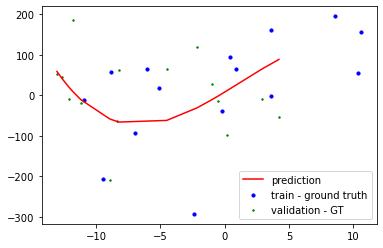

In [15]:
plt.figure()
plt.scatter(X[:,0], y, label="train - ground truth", color= "blue", s=10)
prediction = reg.predict(polyFeatures.transform(Xval))
plt.scatter(Xval[:,0], yval, label="validation - GT", color="green", s=2)
arg = np.argsort(Xval[:,0])
plt.plot(Xval[:,0][arg], prediction[arg], label="prediction", color="red")
plt.legend()

## We now serialize and try with some regularization (L2)

In [16]:
## simple case where visualization is possible: D=2
D = 1
PGT = 3 # degree of ground truth polynom
N = 15
Nval=500
noise = 50/2

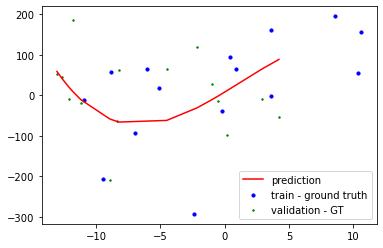

In [17]:
plt.figure()
plt.scatter(X[:,0], y, label="train - ground truth", color= "blue", s=10)
prediction = reg.predict(polyFeatures.transform(Xval))
plt.scatter(Xval[:,0], yval, label="validation - GT", color="green", s=2)
arg = np.argsort(Xval[:,0])
plt.plot(Xval[:,0][arg], prediction[arg], label="prediction", color="red")
plt.legend()

In [18]:
np.random.seed(6)
c = groundTruthPoly_coeffs(PGT, D)

X = (np.random.random((N,D))-0.5)*30
Xval = (np.random.random((Nval,D))-0.5)*30

y = groundTruthPoly(c, X, noise)
yval = groundTruthPoly(c, Xval, noise)

In [19]:
P = 6

/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.59016e-19): result may not be accurate.
  overwrite_a=True).T
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.59016e-18): result may not be accurate.
  overwrite_a=True).T
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.59016e-17): result may not be accurate.
  overwrite_a=True).T


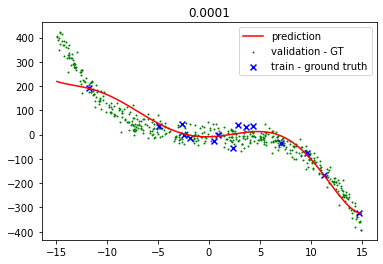

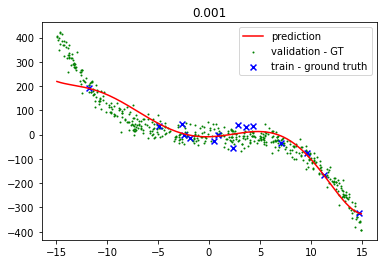

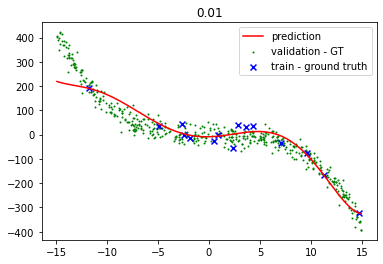

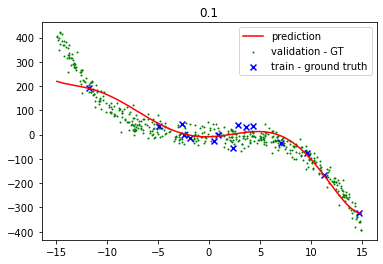

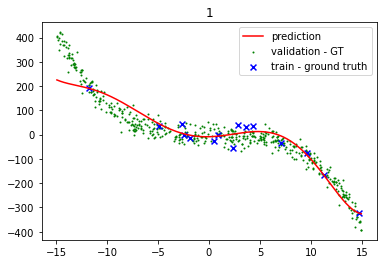

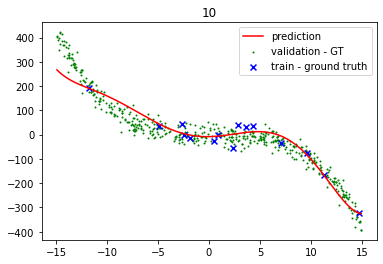

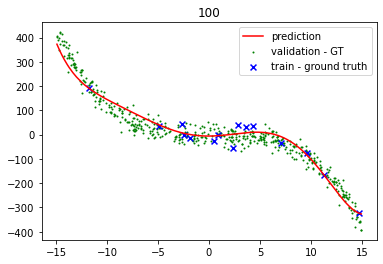

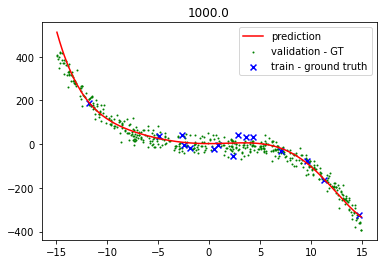

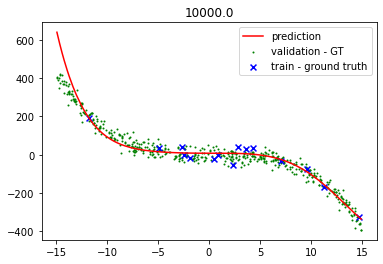

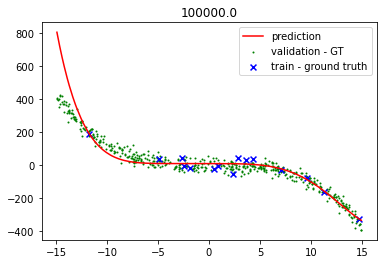

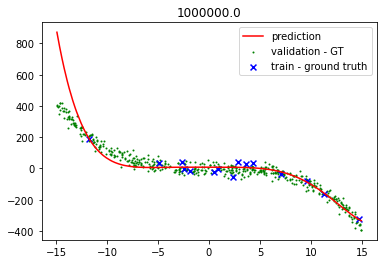

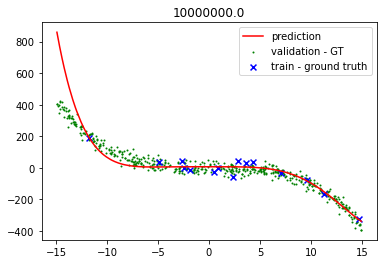

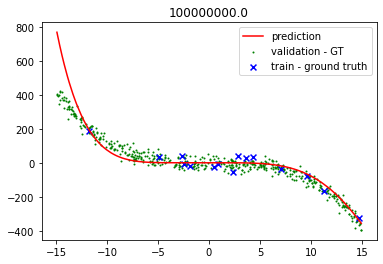

In [20]:
numberOfFeatures = []
L2norms = []
scores = []
trainScores=[]
# Pmax = 20
# Ps = range(1,Pmax)
lambdas = [1e-4,1e-3,0.01,0.1,1,10,100,1e3,1e4,1e5,1e6,1e7,1e8]
for lambda0 in lambdas:
    polyFeatures = sklearn.preprocessing.PolynomialFeatures(P)
    polyFeatures.fit(X)
    Xt = polyFeatures.transform(X)
    featureNames = polyFeatures.get_feature_names()
#     print(featureNames)
    numberOfFeatures.append(len(featureNames))
    
    reg = sklearn.linear_model.Ridge(alpha=lambda0)
    
    reg.fit(Xt,y)
#     print(reg.coef_, reg.intercept_)
    L2norm = ((reg.coef_)**2).sum()+reg.intercept_**2
    L2norms.append(L2norm)
    trainScore = reg.score(polyFeatures.transform(X),y)
    trainScores.append(trainScore)
    score = reg.score(polyFeatures.transform(Xval),yval)
    scores.append(score)
#     print("L2 norm ",L2norm, "   score:",  score)
    plt.figure()
    prediction = reg.predict(polyFeatures.transform(Xval))
    plt.scatter(Xval[:,0], yval, label="validation - GT", color="green", s=1)
    arg = np.argsort(Xval[:,0])
    plt.plot(Xval[:,0][arg], prediction[arg], label="prediction", color="red")
    plt.scatter(X[:,0], y, label="train - ground truth", marker='x', color= "blue", s=35)
    plt.title(str(lambda0))
    plt.legend()


In [21]:
P

6

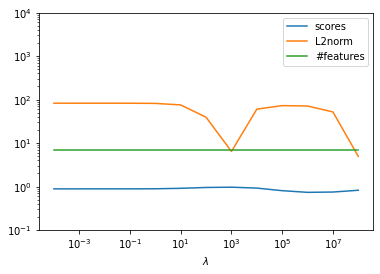

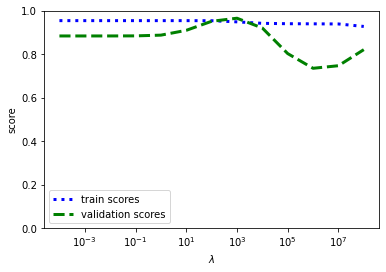

In [22]:
plt.figure()
plt.plot(lambdas, scores, label="scores")
plt.plot(lambdas, L2norms, label="L2norm")
plt.loglog(lambdas, numberOfFeatures, label="#features")
plt.xlabel(r"$\lambda $")
plt.legend()
plt.ylim([1e-1,1e4])
plt.savefig("dependence on regul parameter - for Pmodel="+str(P)+".png")

plt.figure()
plt.semilogx(lambdas, trainScores, ls=":", color='b', lw=3, label="train scores")
plt.semilogx(lambdas, scores     , ls="--", color='g', lw=3, label="validation scores")
plt.xlabel(r"$\lambda $")
plt.ylabel("score")
plt.ylim([0,1])
plt.legend()

In [23]:
P, scores

(6,
 [0.883194755039244,
  0.8831982916309246,
  0.8832336393169811,
  0.8835853023644865,
  0.8869294254193595,
  0.9090232218462775,
  0.950633498038654,
  0.9647643756329959,
  0.9197440271738859,
  0.8021704286927565,
  0.734509850128102,
  0.7463581161872418,
  0.8202465883780601])

## Bonus: comparing how the L2 norm grows, with and without regularization

In [24]:
numberOfFeatures = []
L2norms = []
scores = []
Pmax = 12
Ps = range(1,Pmax)
for P in Ps:
    
    ## make feature map + transform data
    polyFeatures = sklearn.preprocessing.PolynomialFeatures(P)
    polyFeatures.fit(X)
    polyFeatures.get_feature_names()
    Xt = polyFeatures.transform(X)
    featureNames = polyFeatures.get_feature_names()
    print(featureNames)
    numberOfFeatures.append(len(featureNames))
    
    ## linear regression on the extended input
    reg = sklearn.linear_model.LinearRegression()
    reg.fit(Xt,y)
    print(reg.coef_, reg.intercept_)
    
    ## computing the norm, etc
    L2norm = ((reg.coef_)**2).sum()+reg.intercept_**2
    L2norms.append(L2norm)
    score = reg.score(polyFeatures.transform(Xval),yval)
    scores.append(score)
    print("L2 norm ",L2norm, "   score:",  score)


['1', 'x0']
[  0.       -14.357818] 10.658224026944545
L2 norm  319.74467713859326    score: 0.8052117594861081
['1', 'x0', 'x0^2']
[  0.         -12.85214915  -0.36365379] 24.538614478481342
L2 norm  767.453582271242    score: 0.7367093186566138
['1', 'x0', 'x0^2', 'x0^3']
[ 0.          0.26364863  0.0630634  -0.1114286 ] 6.241078778624747
L2 norm  39.03696824796933    score: 0.9717675038758645
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
[ 0.         -0.07547982  0.13790705 -0.10822804 -0.00047714] 5.5527778982298415
L2 norm  30.869771483212656    score: 0.9699723489957525
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
[ 0.00000000e+00  2.70581425e+00  1.94044859e+00 -2.95994754e-01
 -1.34900736e-02  1.15932059e-03] -8.740253306675761
L2 norm  87.56659555372408    score: 0.4978822643553087
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
[ 0.00000000e+00  1.03971939e+00  2.04231399e+00 -1.89637787e-01
 -2.15245871e-02  4.62519287e-04  5.14226777e-05] -8.778151919029149
L2 norm  82.34443997877

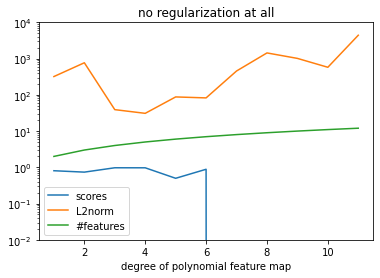

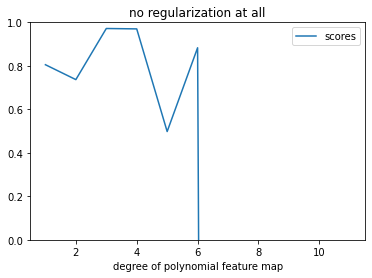

In [25]:
plt.figure()
plt.title("no regularization at all")
plt.plot(Ps, scores, label="scores")
plt.plot(Ps, L2norms, label="L2norm")
plt.semilogy(Ps, numberOfFeatures, label="#features")
plt.xlabel("degree of polynomial feature map")
plt.legend()
plt.ylim([1e-2,1e4])
plt.savefig("norms-without any regularization.png")

plt.figure()
plt.title("no regularization at all")
plt.plot(Ps, scores, label="scores")
plt.ylim([0,1])
plt.xlabel("degree of polynomial feature map")
plt.legend()
plt.savefig("score-without any regularization.png")



In [26]:
numberOfFeatures = []
L2norms = []
scores = []
trainScores=[]
Pmax = 12
LAMBDA=1e5
Ps = range(1,Pmax)
for P in Ps:
    
    ## make feature map + transform data
    polyFeatures = sklearn.preprocessing.PolynomialFeatures(P)
    polyFeatures.fit(X)
    Xt = polyFeatures.transform(X)
    featureNames = polyFeatures.get_feature_names()
    print(featureNames)
    numberOfFeatures.append(len(featureNames))
    
    ## linear regression on the extended input
    reg = sklearn.linear_model.Ridge(alpha=LAMBDA)
    reg.fit(Xt,y)
    print(reg.coef_, reg.intercept_)
    
    ## computing the norm, etc
    L2norm = ((reg.coef_)**2).sum()+reg.intercept_**2
    L2norms.append(L2norm)
    trainScore = reg.score(polyFeatures.transform(X),y)
    trainScores.append(trainScore)
    score = reg.score(polyFeatures.transform(Xval),yval)
    scores.append(score)
    print("L2 norm ",L2norm, "   score:",  score)


['1', 'x0']
[ 0.         -0.09078661] -21.44503670804752
L2 norm  459.89784161732996    score: -0.027210016494006117
['1', 'x0', 'x0^2']
[ 0.         -0.08170904 -0.34673283] -5.00056578892368
L2 norm  25.132558228539317    score: -0.09907715428011965
['1', 'x0', 'x0^2', 'x0^3']
[ 0.         -0.00051074  0.01434618 -0.10733963] 7.993736264818118
L2 norm  63.91154734111548    score: 0.9678277116887755
['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
[ 0.         -0.00027441  0.00694919 -0.10835185  0.0001539 ] 7.6605870082953444
L2 norm  58.69638182606422    score: 0.9697443897433355
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
[ 0.00000000e+00 -5.58151306e-04  3.98917540e-03 -1.02969161e-01
  2.90537618e-04 -3.50048804e-05] 7.155896516714943
L2 norm  51.21747391680422    score: 0.9713269913401869
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
[ 0.00000000e+00 -4.58797417e-04  1.10809581e-02 -1.94363078e-02
 -8.08107244e-03 -6.81367084e-04  5.65851191e-05] 8.51019019546829
L2 norm  72.4239037024

/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.37962e-17): result may not be accurate.
  overwrite_a=True).T
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.07904e-19): result may not be accurate.
  overwrite_a=True).T
/home/flandes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.03553e-21): result may not be accurate.
  overwrite_a=True).T


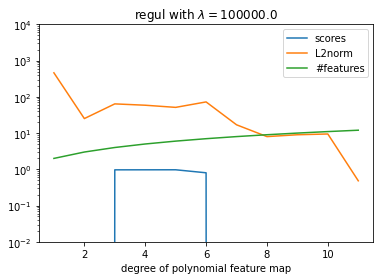

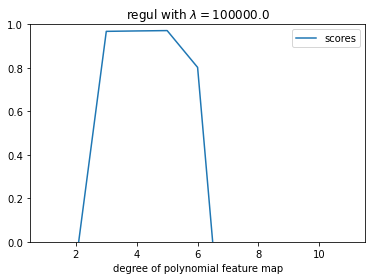

In [27]:
plt.figure()
plt.title("regul with $\lambda=$"+str(LAMBDA))
plt.plot(Ps, scores, label="scores")
plt.plot(Ps, L2norms, label="L2norm")
plt.semilogy(Ps, numberOfFeatures, label="#features")
plt.xlabel("degree of polynomial feature map")
plt.ylim([1e-2,1e4])
plt.legend()
plt.savefig("norms-regul - lambda="+str(LAMBDA)+"s.png")

plt.figure()
plt.title("regul with $\lambda=$"+str(LAMBDA))
plt.plot(Ps, scores, label="scores")
plt.ylim([0,1])
plt.xlabel("degree of polynomial feature map")
plt.legend()
plt.savefig("score-regul - lambda="+str(LAMBDA)+".png")